## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765
0:	learn: 0.9793830	total: 47.7ms	remaining: 47.7s
1:	learn: 0.9582303	total: 48.7ms	remaining: 24.3s
2:	learn: 0.9353695	total: 49.6ms	remaining: 16.5s
3:	learn: 0.9161608	total: 50.6ms	remaining: 12.6s
4:	learn: 0.8990488	total: 51.5ms	remaining: 10.2s
5:	learn: 0.8832373	total: 52.3ms	remaining: 8.67s
6:	learn: 0.8650817	total: 53.2ms	remaining: 7.55s
7:	learn: 0.8477194	total: 54.1ms	remaining: 6.71s
8:	learn: 0.8311338	total: 55ms	remaining: 6.05s
9:	learn: 0.8132347	total: 55.8ms	remaining: 5.52s
10:	learn: 0.7953546	total: 56.5ms	remaining: 5.08s
11:	learn: 0.7796915	total: 57.4ms	remaining: 4.72s
12:	learn: 0.7641617	total: 58.2ms	remaining: 4.42s
13:	learn: 0.7484061	total: 59ms	remaining: 4.15s
14:	learn: 0.7353909	total: 59.8ms	remaining: 3.92s
15:	learn: 0.7199546	total: 60.6ms	remaining: 3.73s
16:	learn: 0.7058790	total: 61.5ms	remaining: 3.56s
17:	learn: 0.6928959	total: 62.3ms	remaining: 3.4s
18:	learn: 0.6802797	total: 63.1ms	remaining: 3.2

110:	learn: 0.2847736	total: 147ms	remaining: 1.18s
111:	learn: 0.2837297	total: 148ms	remaining: 1.17s
112:	learn: 0.2825964	total: 149ms	remaining: 1.17s
113:	learn: 0.2811402	total: 150ms	remaining: 1.16s
114:	learn: 0.2797104	total: 151ms	remaining: 1.16s
115:	learn: 0.2785930	total: 152ms	remaining: 1.16s
116:	learn: 0.2773867	total: 153ms	remaining: 1.15s
117:	learn: 0.2762157	total: 154ms	remaining: 1.15s
118:	learn: 0.2751476	total: 154ms	remaining: 1.14s
119:	learn: 0.2742685	total: 155ms	remaining: 1.14s
120:	learn: 0.2732505	total: 156ms	remaining: 1.13s
121:	learn: 0.2722779	total: 157ms	remaining: 1.13s
122:	learn: 0.2706818	total: 158ms	remaining: 1.13s
123:	learn: 0.2699505	total: 159ms	remaining: 1.12s
124:	learn: 0.2691699	total: 160ms	remaining: 1.12s
125:	learn: 0.2678759	total: 161ms	remaining: 1.11s
126:	learn: 0.2667829	total: 162ms	remaining: 1.11s
127:	learn: 0.2658124	total: 162ms	remaining: 1.11s
128:	learn: 0.2648855	total: 163ms	remaining: 1.1s
129:	learn: 0

265:	learn: 0.1859478	total: 284ms	remaining: 784ms
266:	learn: 0.1853456	total: 285ms	remaining: 783ms
267:	learn: 0.1850007	total: 286ms	remaining: 781ms
268:	learn: 0.1845694	total: 287ms	remaining: 780ms
269:	learn: 0.1840414	total: 288ms	remaining: 778ms
270:	learn: 0.1836199	total: 289ms	remaining: 777ms
271:	learn: 0.1832198	total: 290ms	remaining: 775ms
272:	learn: 0.1826792	total: 290ms	remaining: 774ms
273:	learn: 0.1824564	total: 291ms	remaining: 772ms
274:	learn: 0.1820491	total: 292ms	remaining: 771ms
275:	learn: 0.1816464	total: 294ms	remaining: 771ms
276:	learn: 0.1813464	total: 295ms	remaining: 769ms
277:	learn: 0.1810632	total: 296ms	remaining: 768ms
278:	learn: 0.1808467	total: 297ms	remaining: 767ms
279:	learn: 0.1804819	total: 298ms	remaining: 765ms
280:	learn: 0.1800651	total: 299ms	remaining: 764ms
281:	learn: 0.1796570	total: 299ms	remaining: 762ms
282:	learn: 0.1792465	total: 300ms	remaining: 761ms
283:	learn: 0.1789390	total: 301ms	remaining: 760ms
284:	learn: 

420:	learn: 0.1399994	total: 421ms	remaining: 580ms
421:	learn: 0.1397342	total: 422ms	remaining: 578ms
422:	learn: 0.1394127	total: 423ms	remaining: 577ms
423:	learn: 0.1392442	total: 424ms	remaining: 576ms
424:	learn: 0.1391315	total: 425ms	remaining: 575ms
425:	learn: 0.1388550	total: 426ms	remaining: 574ms
426:	learn: 0.1385804	total: 427ms	remaining: 572ms
427:	learn: 0.1383226	total: 427ms	remaining: 571ms
428:	learn: 0.1382481	total: 428ms	remaining: 570ms
429:	learn: 0.1381061	total: 429ms	remaining: 569ms
430:	learn: 0.1378797	total: 430ms	remaining: 568ms
431:	learn: 0.1376125	total: 431ms	remaining: 567ms
432:	learn: 0.1373761	total: 432ms	remaining: 565ms
433:	learn: 0.1370286	total: 432ms	remaining: 564ms
434:	learn: 0.1368676	total: 433ms	remaining: 563ms
435:	learn: 0.1367230	total: 434ms	remaining: 562ms
436:	learn: 0.1364168	total: 435ms	remaining: 560ms
437:	learn: 0.1362182	total: 436ms	remaining: 559ms
438:	learn: 0.1360213	total: 437ms	remaining: 558ms
439:	learn: 

571:	learn: 0.1107175	total: 557ms	remaining: 416ms
572:	learn: 0.1106324	total: 558ms	remaining: 416ms
573:	learn: 0.1105007	total: 558ms	remaining: 414ms
574:	learn: 0.1103881	total: 560ms	remaining: 414ms
575:	learn: 0.1102270	total: 560ms	remaining: 413ms
576:	learn: 0.1101366	total: 561ms	remaining: 411ms
577:	learn: 0.1099650	total: 562ms	remaining: 410ms
578:	learn: 0.1098071	total: 563ms	remaining: 409ms
579:	learn: 0.1097665	total: 564ms	remaining: 408ms
580:	learn: 0.1096448	total: 565ms	remaining: 407ms
581:	learn: 0.1095074	total: 565ms	remaining: 406ms
582:	learn: 0.1092804	total: 566ms	remaining: 405ms
583:	learn: 0.1091220	total: 567ms	remaining: 404ms
584:	learn: 0.1089874	total: 568ms	remaining: 403ms
585:	learn: 0.1088403	total: 569ms	remaining: 402ms
586:	learn: 0.1087434	total: 570ms	remaining: 401ms
587:	learn: 0.1086236	total: 571ms	remaining: 400ms
588:	learn: 0.1085040	total: 571ms	remaining: 399ms
589:	learn: 0.1083450	total: 572ms	remaining: 398ms
590:	learn: 

731:	learn: 0.0881688	total: 694ms	remaining: 254ms
732:	learn: 0.0880595	total: 696ms	remaining: 254ms
733:	learn: 0.0879679	total: 697ms	remaining: 253ms
734:	learn: 0.0878012	total: 698ms	remaining: 252ms
735:	learn: 0.0876577	total: 699ms	remaining: 251ms
736:	learn: 0.0874508	total: 699ms	remaining: 250ms
737:	learn: 0.0873213	total: 700ms	remaining: 249ms
738:	learn: 0.0872469	total: 701ms	remaining: 248ms
739:	learn: 0.0871200	total: 702ms	remaining: 247ms
740:	learn: 0.0870099	total: 703ms	remaining: 246ms
741:	learn: 0.0868670	total: 704ms	remaining: 245ms
742:	learn: 0.0867763	total: 704ms	remaining: 244ms
743:	learn: 0.0865935	total: 705ms	remaining: 243ms
744:	learn: 0.0865224	total: 706ms	remaining: 242ms
745:	learn: 0.0864190	total: 707ms	remaining: 241ms
746:	learn: 0.0862436	total: 708ms	remaining: 240ms
747:	learn: 0.0860981	total: 709ms	remaining: 239ms
748:	learn: 0.0860167	total: 710ms	remaining: 238ms
749:	learn: 0.0859178	total: 710ms	remaining: 237ms
750:	learn: 

888:	learn: 0.0724269	total: 833ms	remaining: 104ms
889:	learn: 0.0723435	total: 834ms	remaining: 103ms
890:	learn: 0.0722374	total: 835ms	remaining: 102ms
891:	learn: 0.0721752	total: 836ms	remaining: 101ms
892:	learn: 0.0721431	total: 837ms	remaining: 100ms
893:	learn: 0.0721222	total: 837ms	remaining: 99.3ms
894:	learn: 0.0720317	total: 838ms	remaining: 98.3ms
895:	learn: 0.0719025	total: 839ms	remaining: 97.4ms
896:	learn: 0.0718336	total: 840ms	remaining: 96.5ms
897:	learn: 0.0717123	total: 841ms	remaining: 95.5ms
898:	learn: 0.0716899	total: 842ms	remaining: 94.6ms
899:	learn: 0.0715609	total: 843ms	remaining: 93.6ms
900:	learn: 0.0715050	total: 844ms	remaining: 92.7ms
901:	learn: 0.0713680	total: 845ms	remaining: 91.8ms
902:	learn: 0.0713188	total: 845ms	remaining: 90.8ms
903:	learn: 0.0712574	total: 846ms	remaining: 89.9ms
904:	learn: 0.0711526	total: 847ms	remaining: 88.9ms
905:	learn: 0.0710842	total: 848ms	remaining: 88ms
906:	learn: 0.0709884	total: 849ms	remaining: 87ms
90

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

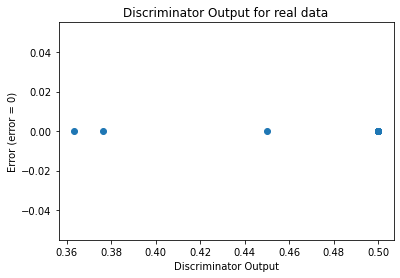

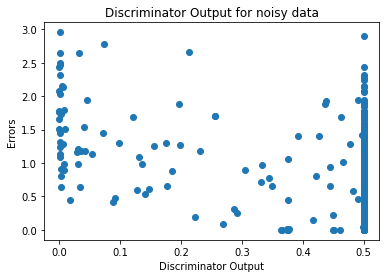

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

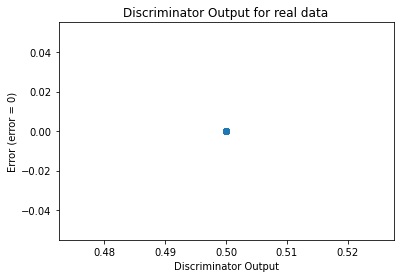

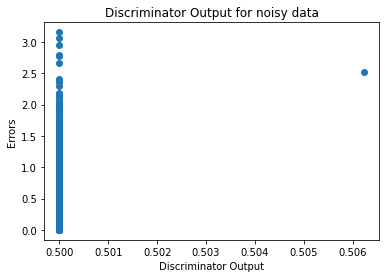

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
